In [ ]:
## This will connect your Google drive with your Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Installs Pandas

In [ ]:
# You can install things within a notebook by using the ! notation
!pip install pandas scikit-learn numpy nltk

## Imports the Training Data and Prints Every Data Column

In [ ]:
# imports the data into df and prints the different columns
import pandas as pd
df = pd.read_csv('/content/drive/Shareddrives/CS74/train.csv')
print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license', 'price'],
      dtype='object')


## Prints the Numeric Variables as a Function of Price in a Scatter Plot Format

<Axes: xlabel='availability_365', ylabel='price'>

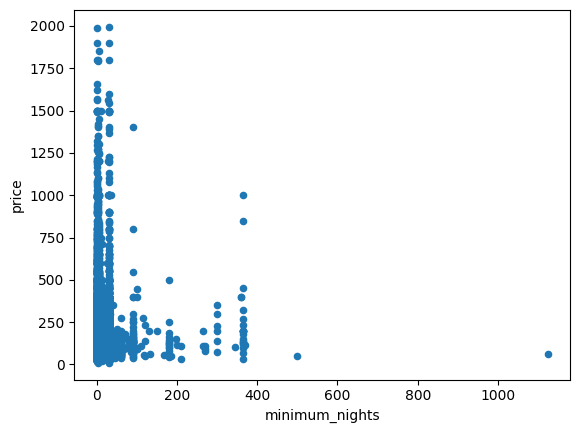

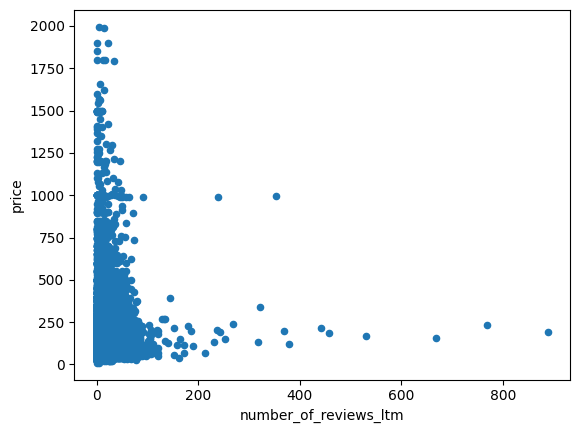

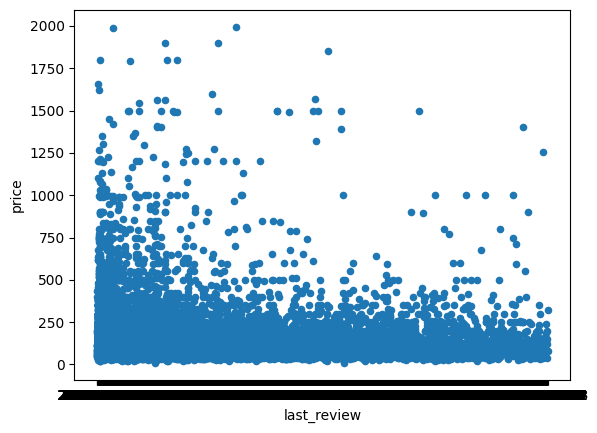

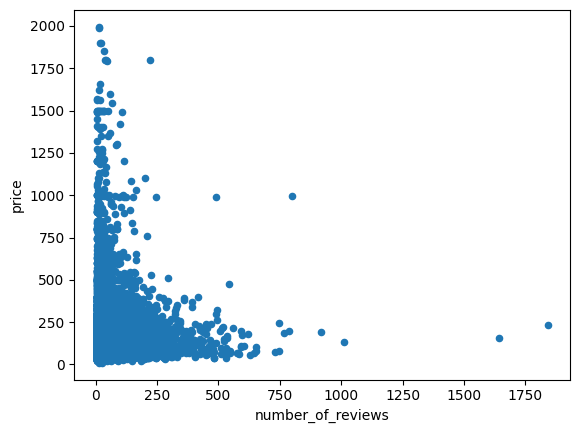

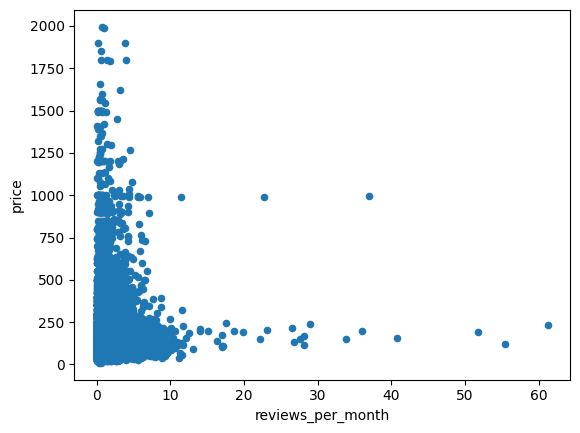

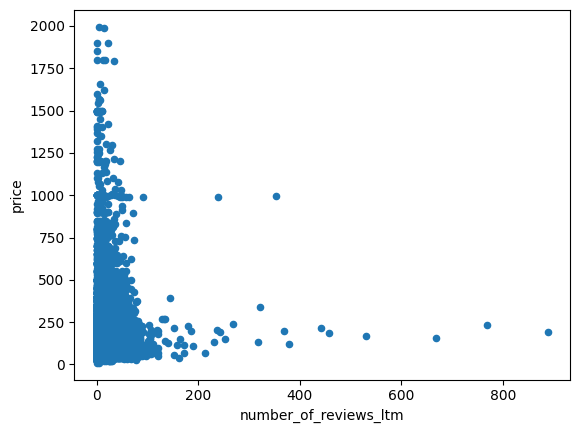

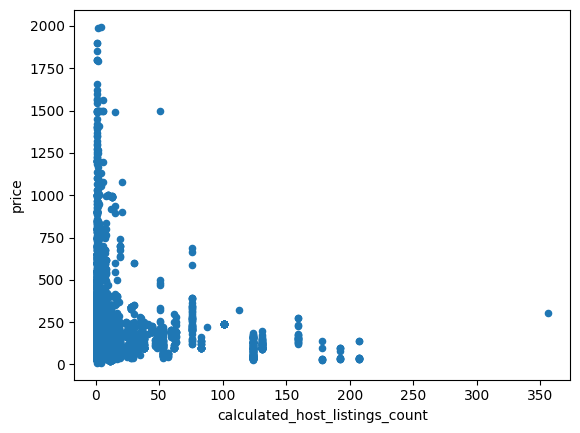

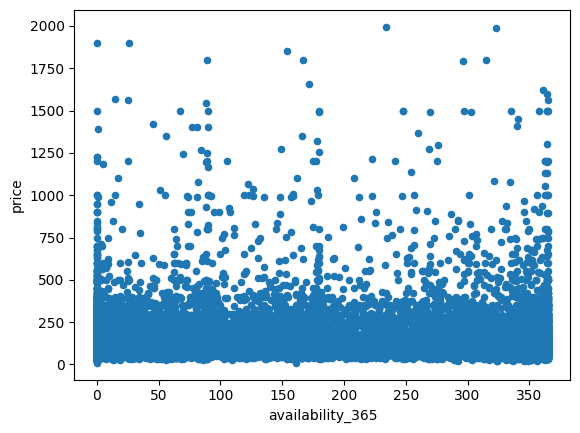

In [ ]:
# a collection of scatter plots with every numerical data point
df.plot.scatter("minimum_nights", "price")
df.plot.scatter("number_of_reviews_ltm", "price")
df.plot.scatter("last_review", "price")
df.plot.scatter("number_of_reviews", "price")
df.plot.scatter("reviews_per_month", "price")
df.plot.scatter("number_of_reviews_ltm", "price")
df.plot.scatter("calculated_host_listings_count", "price")
df.plot.scatter("availability_365", "price")

## Prints the Neighbourhood As A Function of Price in a Bar Graph Format

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license', 'price'],
      dtype='object')


<Axes: xlabel='room_type'>

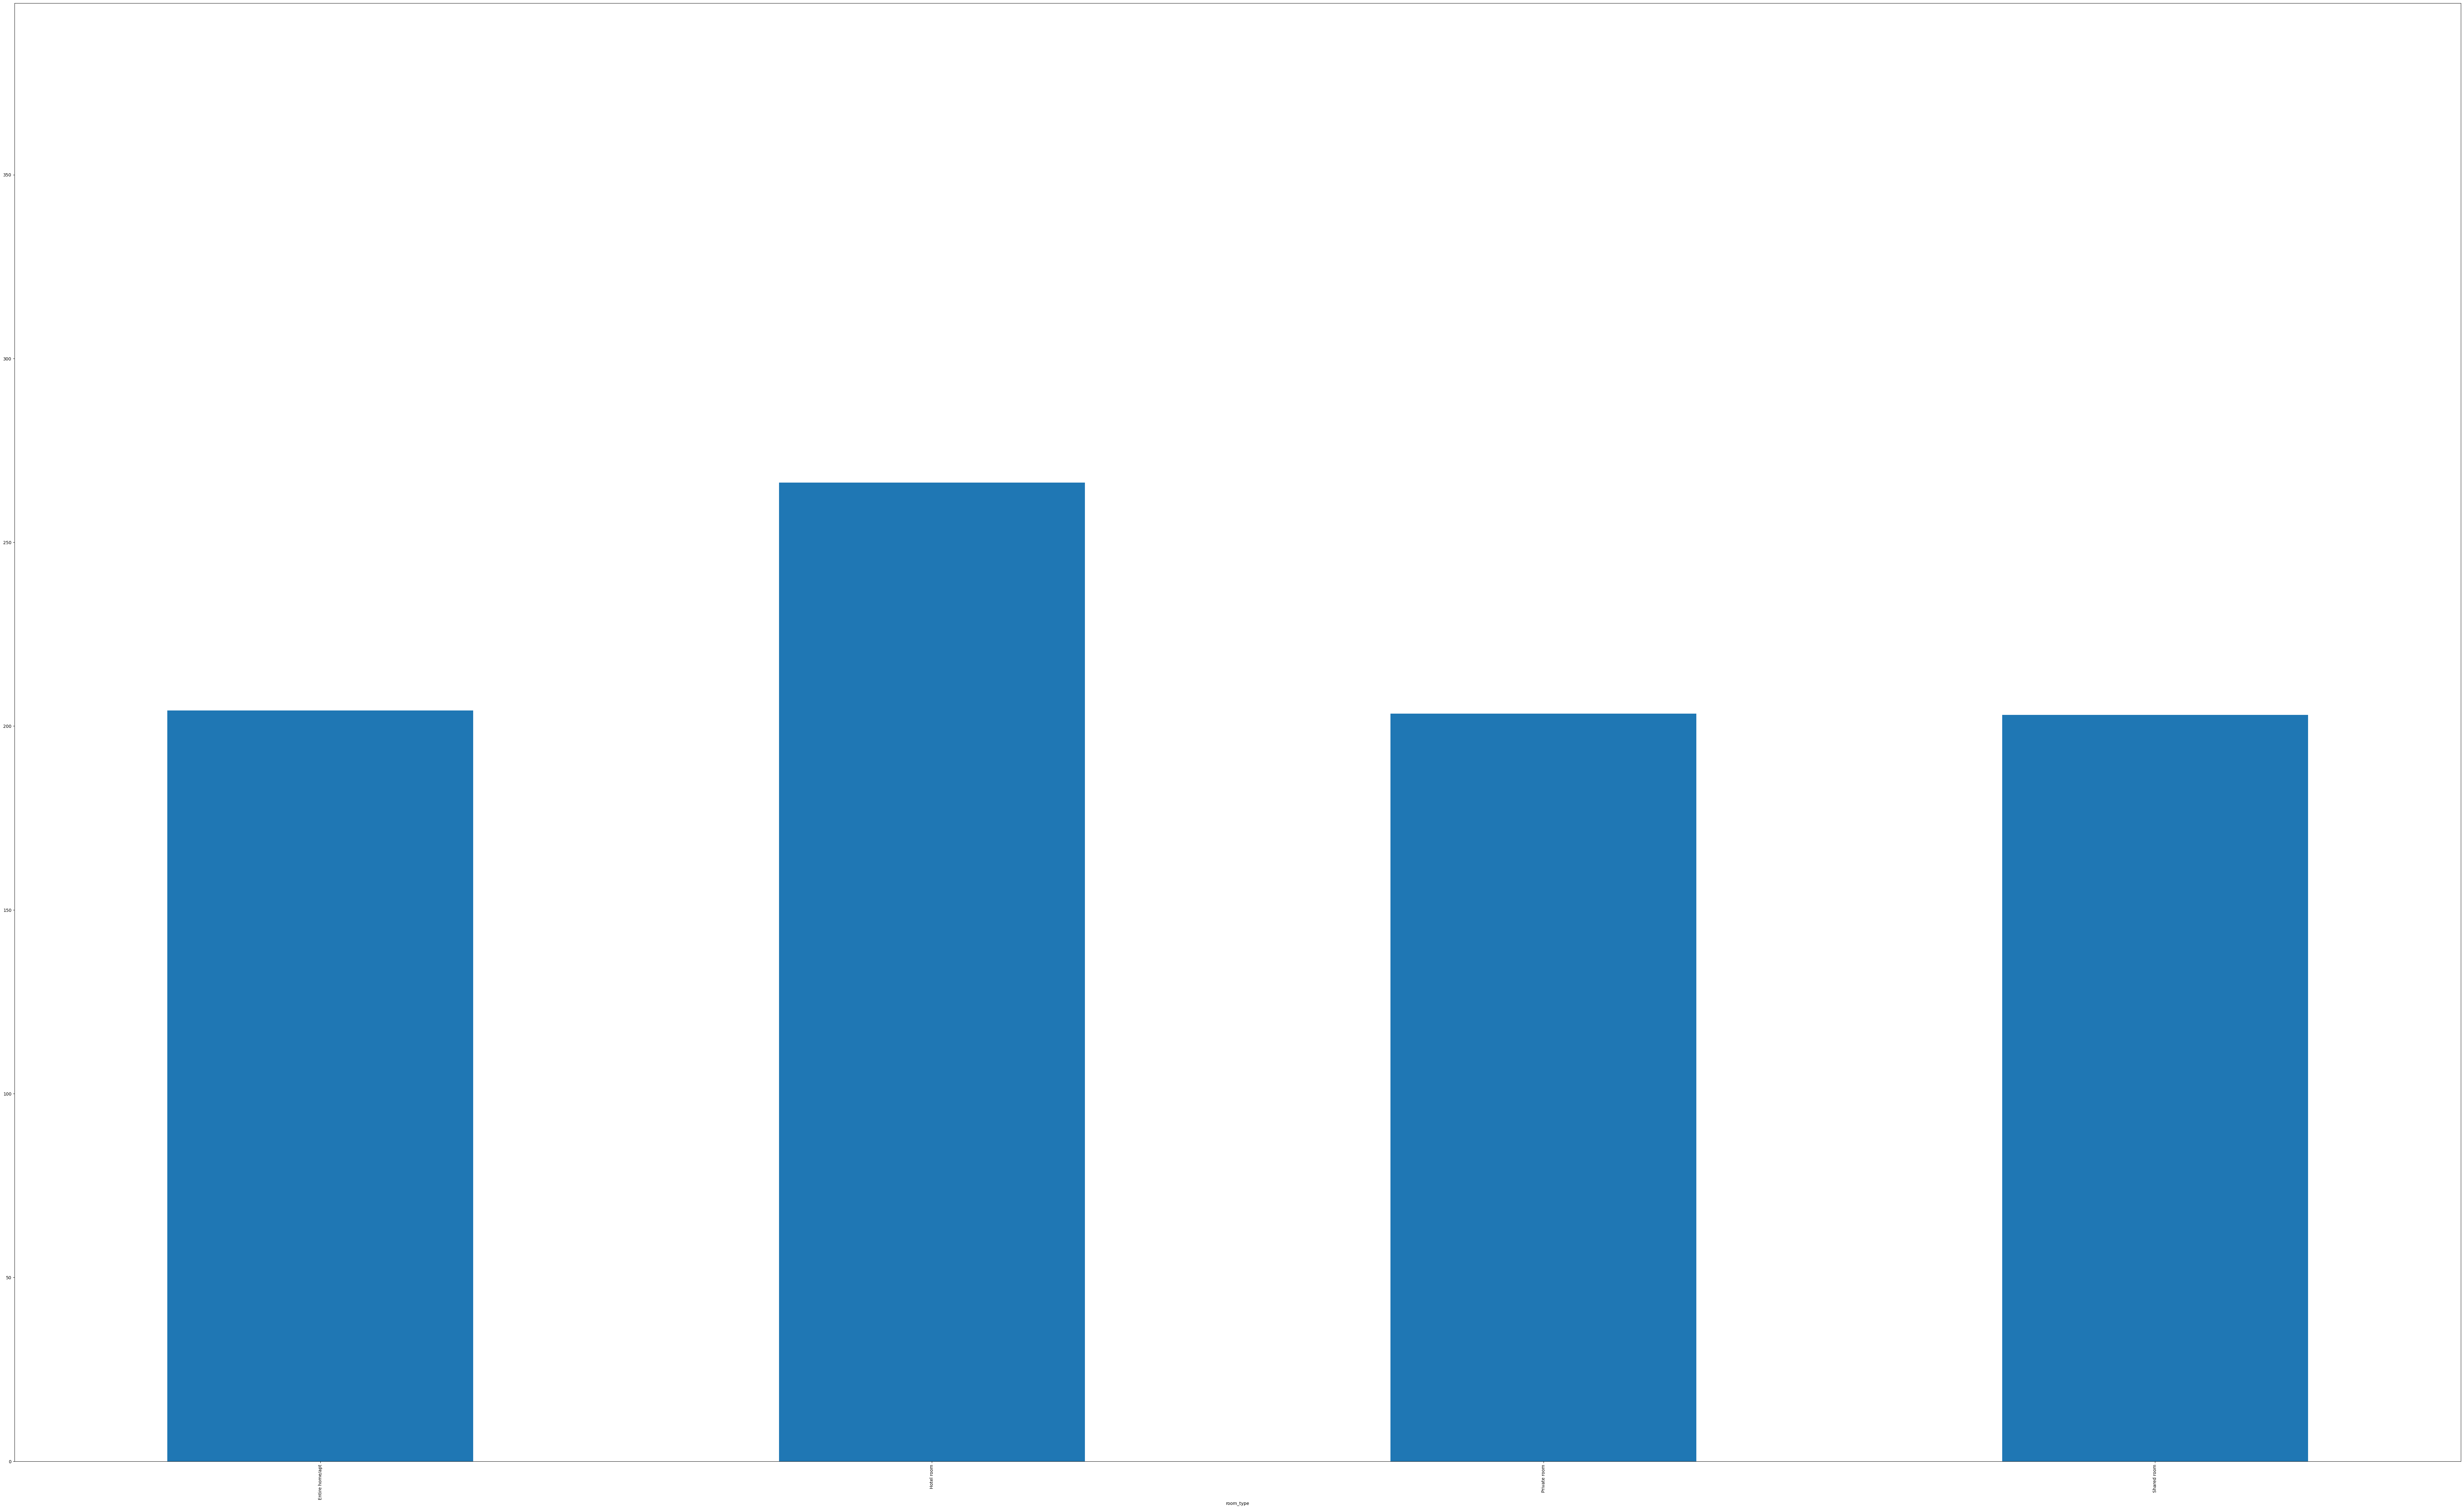

In [ ]:
# extracts the neighborhood data category, and prints it as a categorical bar graph
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/Shareddrives/CS74/train.csv')
print(df.columns)
af = df.groupby('neighbourhood')['price'].mean()
af.plot.bar("neighbourhood", "price", figsize=(100, 60))

## The Logistic Regression

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# import the data into a dataframe df
df = pd.read_csv('/content/drive/Shareddrives/CS74/train.csv')

test_df = pd.read_csv('/content/drive/Shareddrives/CS74/test.csv')

excluded_col = ['name', 'id','host_id', 'host_name', 'last_review', 'license', 'latitude', 'longitude', 'number_of_reviews_ltm', 'calculated_host_listings_count', 'availability_365', 'neighbourhood']
included_col = ['number_of_reviews','reviews_per_month', 'room_type', 'minimum_nights', 'neighbourhood_group', 'price']

categorical_col = ['room_type', 'neighbourhood_group']


df = df.drop(columns=excluded_col)
test_df_new = test_df.drop(columns=excluded_col)
feature_matrix = pd.get_dummies(df, columns=categorical_col)
test_feature_matrix = pd.get_dummies(test_df_new, columns=categorical_col)

X_train = feature_matrix.drop(['price'], axis='columns')
y_train = feature_matrix['price']
X_test = test_feature_matrix

model = LogisticRegression(solver='lbfgs', max_iter=100, C=.1, penalty="l2")
model.fit(X_train, y_train)

Index(['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'price',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island'],
      dtype='object')
       minimum_nights  number_of_reviews  reviews_per_month  price  \
0                  30                277               2.28    199   
1                   3                 37               0.50    432   
2                   2                 25               0.24    400   
3                  30                 16               0.15    129   
4                  30                  7               0.15    250   
...               ...                ...                ...    ...   
16216              30                 22               0.32     52   
16217               3                  6 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

## Logistic Regression Model predictions

In [ ]:
import pandas as pd
X_test = test_feature_matrix
predictions = model.predict(X_test)
values = []
submission = pd.DataFrame({'id': test_df['id'], 'price': predictions})
for item in predictions:
  if item not in values:
    values.append(item)
submission.to_csv('/content/drive/Shareddrives/CS74/submission13.csv', index=False)
print(predictions)
print(values)

[150 150 150 ...  60  70  55]
[150, 60, 55, 100, 70, 80, 65, 135, 99, 1400]


## Trains the Model Using a Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('/content/drive/Shareddrives/CS74/train.csv')
test_df = pd.read_csv('/content/drive/Shareddrives/CS74/test.csv')

# df['last_review'] = pd.to_datetime(df['last_review']).dt.strftime('%Y%m%d')
# test_df['last_review'] = pd.to_datetime(test_df['last_review']).dt.strftime('%Y%m%d')


excluded_col = ['name', 'id','host_id', 'last_review','host_name', 'license', 'neighbourhood']
included_col = ['number_of_reviews','reviews_per_month', 'minimum_nights','room_type','neighbourhood_group', 'latitude', 'longitude', 'number_of_reviews_ltm', 'calculated_host_listings_count', 'availability_365',  'price']

# excluded_col = ['name', 'id','host_id', 'host_name', 'last_review', 'license', 'latitude', 'longitude', 'number_of_reviews_ltm', 'calculated_host_listings_count', 'availability_365', 'neighbourhood']
# included_col = ['number_of_reviews','reviews_per_month', 'room_type', 'minimum_nights', 'neighbourhood_group', 'price']

categorical_col = ['room_type','neighbourhood_group']


df = df.drop(columns=excluded_col)
test_df_new = test_df.drop(columns=excluded_col)
feature_matrix = pd.get_dummies(df, columns=categorical_col)
test_feature_matrix = pd.get_dummies(test_df_new, columns=categorical_col)

X_train = feature_matrix.drop(['price'], axis='columns')
y_train = feature_matrix['price']
X_test = test_feature_matrix

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

## Random Forest Model predictions

In [ ]:
import pandas as pd
X_test = test_feature_matrix
predictions = model.predict(X_test)
submission = pd.DataFrame({'id': test_df['id'], 'price': predictions})

submission.to_csv('/content/drive/Shareddrives/CS74/submission16.csv', index=False)
print(predictions)


[188.748 183.712 206.604 ...  53.93   67.834  97.29 ]
